<a href="https://colab.research.google.com/github/YangTaeSung/CAU-MachineLearning/blob/master/assignment04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import numpy as np

In [51]:
"""
import csv

with open('data_train.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 1 
    for i in reader:
        # print('data_train[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
        ct += 1

with open('data_test.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 1 
    for i in reader:
        # print('data_test[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
        ct += 1
"""

"\nimport csv\n\nwith open('data_train.csv', newline='') as myfile:\n    reader  = csv.reader(myfile, delimiter=',')\n    ct = 1 \n    for i in reader:\n        # print('data_train[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])\n        ct += 1\n\nwith open('data_test.csv', newline='') as myfile:\n    reader  = csv.reader(myfile, delimiter=',')\n    ct = 1 \n    for i in reader:\n        # print('data_test[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])\n        ct += 1\n"

In [52]:
import pandas as pd
df = pd.read_csv("data_test.csv", names = ['A', 'B', 'C', 'D'])
df.head()

,A,B,C,D
0,-1.788894,-2.717927,-4.425695,-14.055818
1,2.958174,4.515505,6.644435,20.504905
2,-0.569490,10.096246,-13.270292,-73.843148
3,4.279318,2.747878,-5.857125,-24.644937
4,0.125975,-4.349421,5.777460,31.934657


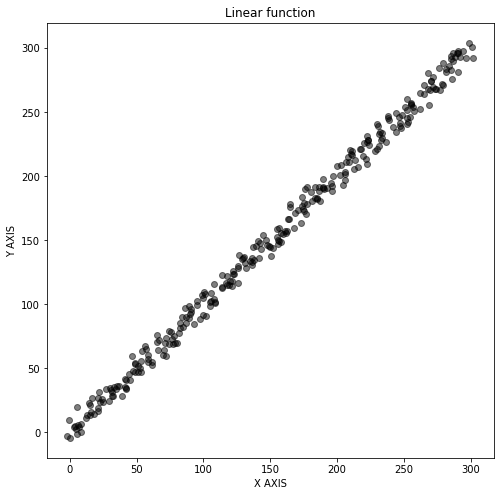

In [53]:
X = df["A"]
y = df["B"]

plt.figure(figsize=(8, 8)) # 그래프 사이즈 조절
plt.title('Linear function')
plt.xlabel('X AXIS')
plt.ylabel('Y AXIS')
plt.plot(X, y, 'o', c = 'black', alpha = 0.5)
plt.show()